In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yuness","key":"a255cfbc1b7e14cbd160722f93254ae2"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
#! kaggle datasets list

In [8]:
! kaggle datasets download -d kanakmittal/anime-and-cartoon-image-classification

 99% 487M/493M [00:05<00:00, 99.3MB/s]
100% 493M/493M [00:05<00:00, 96.2MB/s]


In [9]:
!mkdir animeorcartoon

In [10]:
!unzip anime-and-cartoon-image-classification.zip -d animeorcartoon

Streaming output truncated to the last 5000 lines.
  inflating: animeorcartoon/Training Data/Anime/Psycho Pass/80.jpg  
  inflating: animeorcartoon/Training Data/Anime/Psycho Pass/81.jpg  
  inflating: animeorcartoon/Training Data/Anime/Psycho Pass/9.jpg  
  inflating: animeorcartoon/Training Data/Anime/Puella Magi Madoka Magica/1.jpg  
  inflating: animeorcartoon/Training Data/Anime/Puella Magi Madoka Magica/10.jpg  
  inflating: animeorcartoon/Training Data/Anime/Puella Magi Madoka Magica/11.jpg  
  inflating: animeorcartoon/Training Data/Anime/Puella Magi Madoka Magica/12.jpg  
  inflating: animeorcartoon/Training Data/Anime/Puella Magi Madoka Magica/13.jpg  
  inflating: animeorcartoon/Training Data/Anime/Puella Magi Madoka Magica/14.jpg  
  inflating: animeorcartoon/Training Data/Anime/Puella Magi Madoka Magica/15.jpg  
  inflating: animeorcartoon/Training Data/Anime/Puella Magi Madoka Magica/16.jpg  
  inflating: animeorcartoon/Training Data/Anime/Puella Magi Madoka Magica/17.jpg

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,ZeroPadding2D,Dropout,Flatten,Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [12]:
cur_path=os.getcwd()

In [13]:
print(cur_path)

/content


In [14]:
anime_path=os.path.join(cur_path,'animeorcartoon','Training Data','Anime')
cartoon_path=os.path.join(cur_path,'animeorcartoon','Training Data','Cartoon')

In [15]:
X=[]
y=[]

In [16]:
for folder in os.listdir(anime_path):
  for file in os.listdir(os.path.join(anime_path,folder)):
    img=cv2.imread(os.path.join(anime_path,folder,file))
    img=cv2.resize(img,(128,128))
    img=np.array(img,dtype='float32')
    img/=255.
    X.append(img)
    y.append(0)

In [17]:
len(X)

4447

In [18]:
for folder in os.listdir(cartoon_path):
  for file in os.listdir(os.path.join(cartoon_path,folder)):
    img=cv2.imread(os.path.join(cartoon_path,folder,file))
    img=cv2.resize(img,(128,128))
    img=np.array(img,dtype='float32')
    img/=255.
    X.append(img)
    y.append(1)

In [19]:
print(len(X)-4447)

4445


In [20]:
X=np.array(X)
y=np.array(y)

In [21]:
print(X.shape)
print(y.shape)

(8892, 128, 128, 3)
(8892,)


In [22]:
len(X)

8892

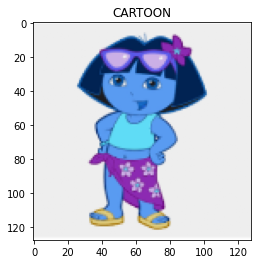

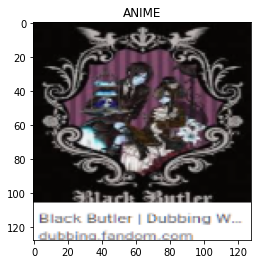

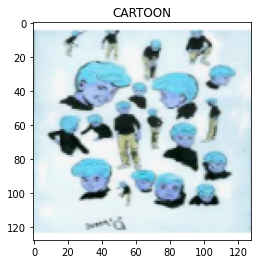

In [23]:
labels={0:'ANIME',1:'CARTOON'}
for i in range(3):
  n=random.randint(0,len(X)-1)
  plt.figure()
  plt.title(labels[y[n]])
  plt.imshow(X[n])

In [24]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,stratify=y)
X_val,X_test,y_val,y_test=train_test_split(X_val,y_val,test_size=0.5,stratify=y_val)

In [25]:
print(len(y_train))
print(len(y_test))

7113
890


In [26]:
'''y_train=to_categorical(y_train,2)
y_test=to_categorical(y_test,2)
y_val=to_categorical(y_val,2)'''

'y_train=to_categorical(y_train,2)\ny_test=to_categorical(y_test,2)\ny_val=to_categorical(y_val,2)'

In [27]:
model=Sequential([
    Conv2D(filters=32,kernel_size=(2,2),activation='relu',input_shape=(128,128,3)),
    MaxPool2D((4,4)),
    #ZeroPadding2D((1,1)),
    Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='valid'),
    MaxPool2D((3,3)),
    Dropout(0.3),
    Conv2D(filters=64,kernel_size=(4,4),activation='relu',padding='same'),
    Conv2D(filters=128,kernel_size=(5,5),activation='relu',padding='same'),
    MaxPool2D((2,2)),
    Dropout(0.4),
    Conv2D(filters=128,kernel_size=(5,5),activation='relu',padding='same'),
    MaxPool2D((2,2)),
    Dropout(0.5),
    Flatten(),
    Dense(512,activation='relu'),
    Dropout(0.5),
    Dense(256,activation='relu'),
    Dropout(0.3),
    Dense(128,activation='relu'),
    Dense(2,activation='softmax')

    ])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 127, 127, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 9, 9, 64)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          6

In [29]:
opt=Adam(learning_rate=0.00005)

In [30]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [31]:
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
223/223 [==============================] - 19s 29ms/step - loss: 0.6947 - accuracy: 0.5012 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/20
223/223 [==============================] - 6s 26ms/step - loss: 0.6934 - accuracy: 0.5095 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 3/20
223/223 [==============================] - 6s 26ms/step - loss: 0.6911 - accuracy: 0.5234 - val_loss: 0.6884 - val_accuracy: 0.5899
Epoch 4/20
223/223 [==============================] - 7s 30ms/step - loss: 0.6507 - accuracy: 0.6207 - val_loss: 0.5976 - val_accuracy: 0.6798
Epoch 5/20
223/223 [==============================] - 6s 28ms/step - loss: 0.5713 - accuracy: 0.7157 - val_loss: 0.5706 - val_accuracy: 0.7045
Epoch 6/20
223/223 [==============================] - 6s 27ms/step - loss: 0.5395 - accuracy: 0.7357 - val_loss: 0.5416 - val_accuracy: 0.7360
Epoch 7/20
223/223 [==============================] - 6s 26ms/step - loss: 0.5223 - accuracy: 0.7505 - val_loss: 0.5260 - val_accuracy: 0.751

In [33]:
model.save('animeorcartoon.h5')